In [1]:
import warnings
from pylj import md, sample, force, util, em
import numpy as np

warnings.filterwarnings('ignore')

## Scattering

pylj is capable of determining the scattering profile from the 2-dimensional simulation of an argon gas analogue.

In [2]:
def md_simulation(number_of_particles, temperature, number_of_steps, sample_frequency):
    # Creates the visualisation environment
    %matplotlib notebook
    # Initialise the system
    system = md.initialise(number_of_particles, temperature, 0.01, 'square')
    # This sets the sampling class
    sample_system = sample.Scattering(system)
    # Start at time 0
    system.time = 0
    # Begin the molecular dynamics loop
    for i in range(0, number_of_steps):
        # At each step, calculate the forces on each particle 
        # and get acceleration
        system = force.compute_forces(system)
        # Run the equations of motion integrator algorithm
        system = md.velocity_verlet(system)
        # Allow the system to interact with a heat bath
        system = force.heat_bath(system, temperature)
        # Iterate the time
        system.time += system.timestep_length
        system.step += 1
        # At a given frequency sample the positions and plot the RDF
        if system.step % sample_frequency == 0:
            sample_system.update(system)  
    sample_system.average()
    return system

<IPython.core.display.Javascript object>


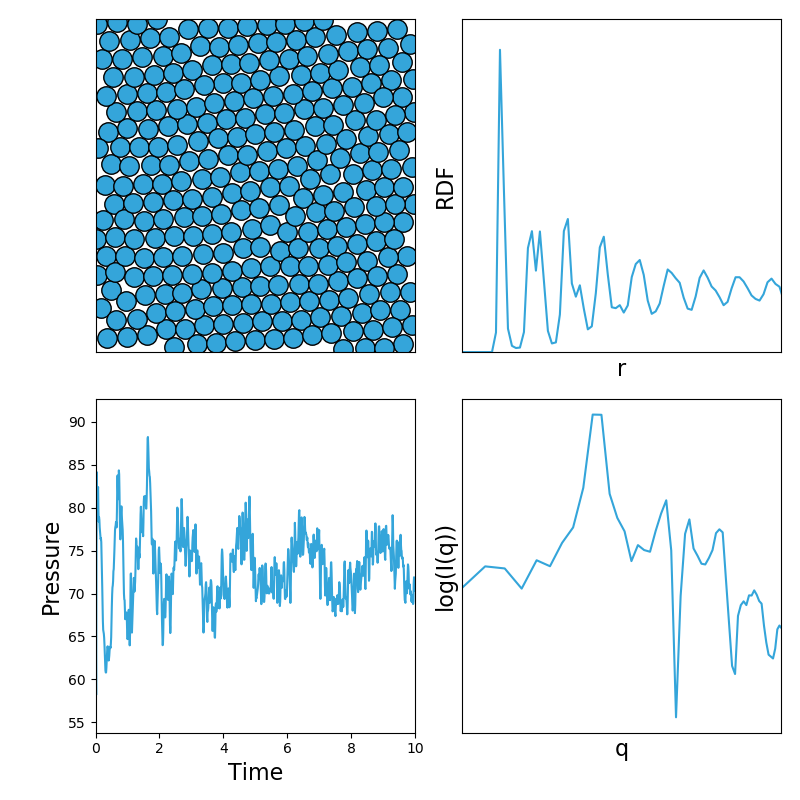

In [13]:
system = md_simulation(300, 1, 1000, 10)